# Neural Network - Exercise 01

    python -m venv NN-venv
    NN-venv\Scripts\activate
    python.exe -m pip install --upgrade pip
    pip install matplotlib numpy ipykernel jupyter
    ipython kernel install --name "NN-venv" --user
    https://queirozf.com/entries/jupyter-kernels-how-to-add-change-remove

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import jupyprint.jupyprint as jp
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
# from graphviz import Digraph 

In [2]:
# List of flags to enable or disable parts of codes

flag_trained_network    = False

flag_my_init_pars       = True
flag_training           = True
flag_save               = True

flag_testing            = True

In [3]:
# Trained Network

if flag_trained_network:
    file_name = 'Trained_Network.mat'
    # file_name = 'Trained_Network-(2024-05-01_19-31-24).mat'
    mat_data = loadmat(file_name)

    weights          = mat_data['Weight'][0]
    correct_outputs  = mat_data['correct_Output'].T[0]
    epoch            = mat_data['epoch'][0][0]
    f_inputs         = mat_data['input']

    jp('### Weights')
    print(weights)
    jp('### Correct Outputs')
    print(correct_outputs)
    jp('### Feature Inputs')
    print(f_inputs)
    jp('### Epoch')
    print(epoch)

## Sigmoid Function

$\text{Sigmoid}(x)=\dfrac{1}{1+e^{-x}}$

$\dfrac{\partial}{\partial x}\left[\text{Sigmoid}(x)\right]=\dfrac{e^{-x}}{(1+e^{-x})^2}=\dfrac{1}{1+e^{-x}}\cdot\left(1-\dfrac{1}{1+e^{-x}}\right)$

In [4]:
# Sigmoid Function

def Sigmoid(x):
    return 1 / (1 + np.exp(-x))

## Stochastic Gradient Descent
$w'_i=w_i-\text{LR}\cdot\frac{\partial f_{cost}}{\partial w_i}=w_i-\text{LR}\cdot\frac{\partial f_{cost}}{\partial P}\cdot\frac{\partial P}{\partial t}\cdot\frac{\partial t}{\partial w_i}$ 

Con:
- $w_i$: Peso della i-esima feature
- $\text{LR}$: Learning Rate
- $f_{cost}$: Funzione di costo
- $t$: Combinazione lineare delle feature pesate 
- $P$: Combinazione lineare normalizzata con la sigmoid

In [5]:
# Stochastic Gradient Descent

def SGD_method(weights, dataset, correct_output, LR = 0.9):
                                                                    # weight:           vettore dei pesi relativi alle feature
                                                                    # f_input:          dataset contenente i valori delle feature per ciascun campione
                                                                    # correct_output:   vettore dei valori attesi per ciascun campione
                                                                    # LR:               learning rate

    for k in range(len(dataset)):                                   # ciclo sui campioni
        
        sample = dataset[k]                                         # prendo i valori delle feature del k-esimo campione
        expected = correct_output[k]                                # prendo il valore atteso del k-esimo campione
        lin_comb = weights @ sample                                 # combinazione lineare delle feature pesate per il k-esimo campione
        predicted = Sigmoid(lin_comb)                               # normalizzazione della comb. lin. attraverso la funzione Sigmoid         
        cost_function_der = 2 * (predicted - expected)              # derivata della funzione di costo (rispetto alla variabile predicted) 
                                                                    # relativa alla metrica Squared Error Cost                         
        sigmoid_der = predicted * (1 - predicted)                   # derivata del sigmoid rispetto a lin_comb
        lc_der = sample                                             # vettore di derivate di lin_comb rispetto ai pesi w (e al bias b)

        dWeights = LR * cost_function_der * sigmoid_der * lc_der    # termine differenziale di aggiustamento per ricavare i nuovi pesi
        weights -= dWeights                                         # correzione dei pesi

    return weights

## Training

In [6]:
# initial parameters

if flag_my_init_pars:
    weights          = 2 * np.random.rand(3) - 1                # crea una matrice 1x3 con numeri casuali tra -1 e 1
    correct_outputs  = np.array([0, 0, 1, 1])               
    epoch            = 1000
    f_inputs         = np.array([[0, 0, 1],
                                 [0, 1, 1],
                                 [1, 0, 1],
                                 [1, 1, 1]])

In [7]:
# Allena il modello in base all'epoca scelta 
if flag_training:
    container_w = np.array([weights])
    for e in range(epoch):
        weights = SGD_method(weights, f_inputs, correct_outputs)
        container_w = np.vstack((container_w, weights))
    # Salva modello
    Trained_Network = {
        "Weight"         : weights,
        "correct_Output" : correct_outputs.T,
        "epoch"          : [[epoch]],
        "input"          : f_inputs
    }

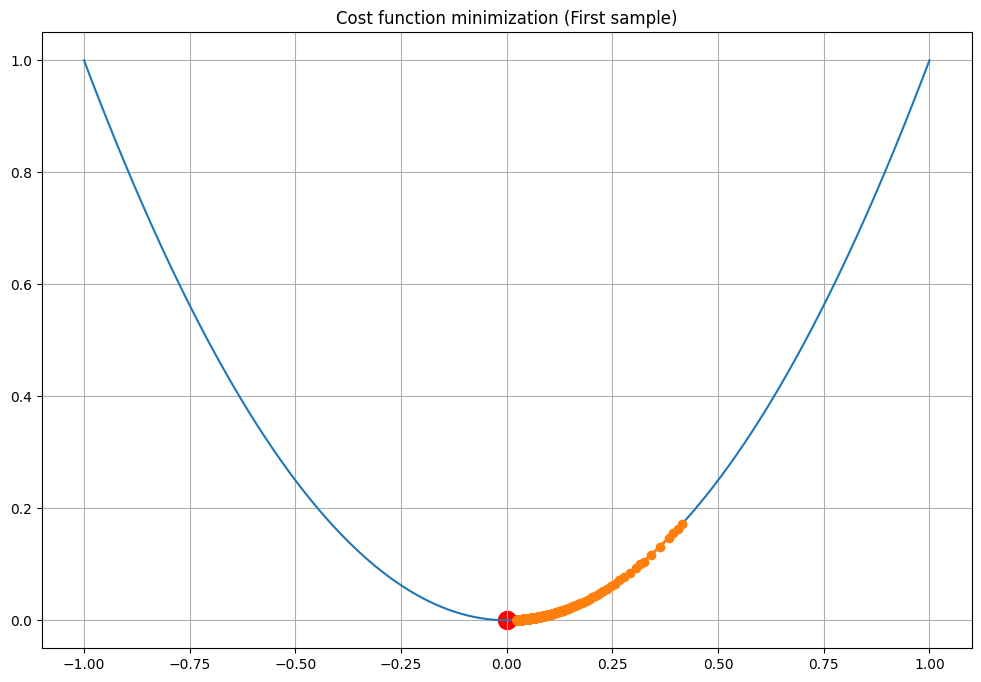

In [8]:
if flag_training:
    def cost_func(x, x0):
        return (x - x0)**2

    x = np.linspace(-1, 1, 1000)  
    x0 = 0

    plt.figure(figsize=(12,8))

    plt.grid()
    plt.plot(x, cost_func(x, x0))

    P = Sigmoid(container_w @ f_inputs[0])
    #P = np.tanh(container_w @ f_inputs[0])
    E = np.ones(len(P)) * correct_outputs[0]
    plt.scatter(E[0],0, color='red', linewidth=8)
    plt.plot(P, cost_func(P, E), marker = 'o')
    plt.title('Cost function minimization (First sample)')
    plt.show()

In [9]:
if flag_save:
    date = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    file_name = f'Trained_Network-[{date}].mat'
    savemat(file_name, Trained_Network)

## Testing

In [10]:
if flag_testing:
       file_name_trained = file_name
       mat_data = loadmat(file_name_trained)

       weights          = mat_data['Weight'][0]
       correct_outputs  = mat_data['correct_Output'].T
       epoch            = mat_data['epoch'][0][0]
       f_inputs         = mat_data['input']

       # Ciclo sui 4 vettori di input
       for k in range(len(f_inputs)):                       
              weighted_sum = weights @ f_inputs[k]  # Prodotto scalare tra pesi allenati e input
              predicted = Sigmoid(weighted_sum) 
              
              print('input ', k+1)
              print('Output corretto : ', correct_outputs[k,0], ', Predetto : ', predicted)

input  1
Output corretto :  0 , Predetto :  0.023333237953779427
input  2
Output corretto :  0 , Predetto :  0.01885790007792101
input  3
Output corretto :  1 , Predetto :  0.9847062558312044
input  4
Output corretto :  1 , Predetto :  0.9810604320624129


# Neural Network per IMPACT-US

## Packages

In [36]:
import sys
sys.path.insert(1, '..\\Machine_Learning')
from myClass import ABC123

import numpy as np
from numpy import linalg as la
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.stats import poisson, lognorm
from scipy.optimize import curve_fit
import pickle

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import KFold # divide il set di dati in k fold (sottogruppi) di dimensioni uguali.
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, auc

## Load dataset

In [37]:
file_mat = loadmat('../Machine_Learning/accidents.mat')
print(file_mat['datasources'])

[[array(['SOURCES: U.S. Department of Transportation, National Highway Traffic Safety Administration, Traffic Safety Facts 2004 Early Edition, Washington, DC: 2005, available at http://www-nrd.nhtsa.dot.gov/pdf/nrd-30/NCSA/TSFAnn/ TSF2004EarlyEdition.pdf as of Dec. 15, 2005; U.S. Department of Transportation, Federal Highway Administration, Highway Statistics 2004, Washington, DC: forthcoming. (Table 2-1:  Highway Traffic Fatalities and Fatality Rates: 2004)'],
        dtype='<U452')                                                                                                                                                                                                                                                                                                                                                                                                                                                           ]
 [array(['SOURCES: U.S. Department of Transportation, National High

## Visualizzazione intero dataset

### Dataset description:
*Data on US traffic accidents and fatalities in 2004 from the US Department of Transportation. The data covers all 50 states and the District of Columbia.*

| Nome dataset  | Descrizione                                                       |
| ------------- | ----------------------------------------------------------------- |
| *datasources* | Fonti                                                             |
| *hwyheaders*  | Nomi delle features                                               |
| *hwydata*     | Valori delle features per stato (righe: stati, colonne: features) |
| *ushwydata*   | Valori delle features complessivi per gli Stati Uniti             |
| *hwycol*      | Numero di features (colonne)                                      |
| *hwyrows*     | Numero di stati compresa District of Columbia (righe)             |
| *statelabel*  | Etichette per le righe di *hwydata* (Nome degli stati)            |
| *uslabel*     | Etichette per le righe di *ushwydata* (United States)             |
| *hwyidx*      | ???                                                               |

In [38]:
jupyprint(pd.DataFrame(file_mat['hwydata'], index = [str(array[0][0]) for array in file_mat['statelabel']], columns = [i[0] for i in file_mat['hwyheaders'][0]] ))

,Census ID,Centroid Longitude,Centroid Latitude,Traffic fatalities,Licensed drivers (thousands),Registered vehicles (thousands),Vehicle-miles traveled (millions),Miles traveled per vehicle,Fatalities per 100K licensed drivers,Fatalities per 100K registered vehicles,Fatalities per 100M vehicle-miles traveled,Fatalities involving high blood alcohol,Percent Alcohol-Related,Total Population,Urban Population,Rural Population,Pct Urban Population
Wyoming,5.600e+01,-1.076e+02,4.303e+01,1.640e+02,3.802e+02,6.715e+02,9.261e+03,1.379e+04,4.314e+01,2.442e+01,1.771e+00,5.400e+01,3.293e+01,4.938e+05,3.221e+05,1.717e+05,6.523e+01
District of Columbia,1.100e+01,-7.703e+01,3.889e+01,4.300e+01,3.491e+02,2.404e+02,3.742e+03,1.557e+04,1.232e+01,1.789e+01,1.149e+00,1.200e+01,2.791e+01,5.721e+05,5.721e+05,0.000e+00,1.000e+02
Vermont,5.000e+01,-7.256e+01,4.404e+01,9.800e+01,5.505e+02,5.515e+02,7.855e+03,1.424e+04,1.780e+01,1.777e+01,1.248e+00,2.000e+01,2.041e+01,6.088e+05,2.326e+05,3.763e+05,3.820e+01
Alaska,2.000e+00,-1.525e+02,6.461e+01,1.010e+02,4.825e+02,6.811e+02,4.990e+03,7.326e+03,2.093e+01,1.483e+01,2.024e+00,3.000e+01,2.970e+01,6.269e+05,4.120e+05,2.150e+05,6.571e+01
North Dakota,3.800e+01,-9.950e+01,4.747e+01,1.000e+02,4.618e+02,7.218e+02,7.594e+03,1.052e+04,2.166e+01,1.385e+01,1.317e+00,3.500e+01,3.500e+01,6.422e+05,3.584e+05,2.838e+05,5.581e+01
South Dakota,4.600e+01,-9.968e+01,4.427e+01,1.970e+02,5.633e+02,8.828e+02,8.784e+03,9.951e+03,3.497e+01,2.232e+01,2.243e+00,7.600e+01,3.858e+01,7.548e+05,3.919e+05,3.629e+05,5.192e+01
Delaware,1.000e+01,-7.549e+01,3.911e+01,1.340e+02,5.339e+02,7.285e+02,9.301e+03,1.277e+04,2.510e+01,1.839e+01,1.441e+00,4.800e+01,3.582e+01,7.836e+05,6.270e+05,1.566e+05,8.002e+01
Montana,3.000e+01,-1.106e+02,4.687e+01,2.290e+02,7.129e+02,1.057e+03,1.121e+04,1.061e+04,3.212e+01,2.167e+01,2.043e+00,1.000e+02,4.367e+01,9.022e+05,4.875e+05,4.147e+05,5.403e+01
Rhode Island,4.400e+01,-7.143e+01,4.159e+01,8.300e+01,7.418e+02,8.345e+02,8.473e+03,1.015e+04,1.119e+01,9.946e+00,9.796e-01,4.100e+01,4.940e+01,1.048e+06,9.533e+05,9.502e+04,9.094e+01
Hawaii,1.500e+01,-1.545e+02,2.105e+01,1.420e+02,8.439e+02,9.705e+02,9.725e+03,1.002e+04,1.683e+01,1.463e+01,1.460e+00,5.200e+01,3.662e+01,1.212e+06,1.109e+06,1.024e+05,9.155e+01


## Catalogazione dataset

In [74]:
data = np.delete(file_mat['hwydata'], 0, axis=1) # Elimina i dati della prima feature perché inutile

features = np.delete(file_mat['hwyheaders'], 0, axis=1) # Elimina l'etichetta della prima feature perché inutile

# data = file_mat['hwydata']
# features = file_mat['hwyheaders']

features = [i[0] for i in features[0]]

state_names = np.array([str(array[0][0]) for array in file_mat['statelabel']])

# Per rendere stati esterni casuali
#index = np.arange(51)
#np.random.shuffle(index)
#idx_ext = index[:10]
#idx_int = index[10:]

idx_ext = [2, 44, 39, 49, 27, 46, 40, 25, 21, 5]
idx_int = [42, 32, 18, 38, 37, 3, 8, 12, 34, 7, 24, 36, 22, 41, 47, 28, 14, 23, 31, 33, 35, 19, 17, 10, 26, 9, 0, 6, 45, 15, 1, 43, 48, 11, 20, 16, 50, 30, 13, 29, 4]

data_ext = data[idx_ext]
data_int = data[idx_int]

state_names_ext = state_names[idx_ext]
state_names_int = state_names[idx_int]

print('Samples:', state_names.tolist())
print('Samples_int:', state_names_int)
print('Samples_ext:', state_names_ext)
print('Features:', features)


density_int = [data_int[:,features.index('Traffic fatalities')] * 100000 / data_int[:,features.index('Total Population')],
               data_int[:,features.index('Fatalities per 100K licensed drivers')],
               data_int[:,features.index('Fatalities per 100K registered vehicles')]
              ]

density_ext = [data_ext[:,features.index('Traffic fatalities')] * 100000 / data_ext[:,features.index('Total Population')],
               data_ext[:,features.index('Fatalities per 100K licensed drivers')],
               data_ext[:,features.index('Fatalities per 100K registered vehicles')]
              ]

# jupyprint(pd.DataFrame(data, index = [str(array[0][0]) for array in file_mat['statelabel']], columns = features ))

Samples: ['Wyoming', 'District of Columbia', 'Vermont', 'Alaska', 'North Dakota', 'South Dakota', 'Delaware', 'Montana', 'Rhode Island', 'Hawaii', 'New Hampshire', 'Maine', 'Idaho', 'Nebraska', 'West Virginia', 'New Mexico', 'Nevada', 'Utah', 'Arkansas', 'Kansas', 'Mississippi', 'Iowa', 'Connecticut', 'Oregon', 'Oklahoma', 'South Carolina', 'Kentucky', 'Colorado', 'Alabama', 'Louisiana', 'Minnesota', 'Arizona', 'Maryland', 'Wisconsin', 'Missouri', 'Tennessee', 'Washington', 'Indiana', 'Massachusetts', 'Virginia', 'North Carolina', 'Georgia', 'New Jersey', 'Michigan', 'Ohio', 'Pennsylvania', 'Illinois', 'Florida', 'New York', 'Texas', 'California']
Samples_int: ['New Jersey' 'Maryland' 'Arkansas' 'Massachusetts' 'Indiana' 'Alaska'
 'Rhode Island' 'Idaho' 'Missouri' 'Montana' 'Oklahoma' 'Washington'
 'Connecticut' 'Georgia' 'Florida' 'Alabama' 'West Virginia' 'Oregon'
 'Arizona' 'Wisconsin' 'Tennessee' 'Kansas' 'Utah' 'New Hampshire'
 'Kentucky' 'Hawaii' 'Wyoming' 'Delaware' 'Pennsylvani

## Prova fit con lognorm

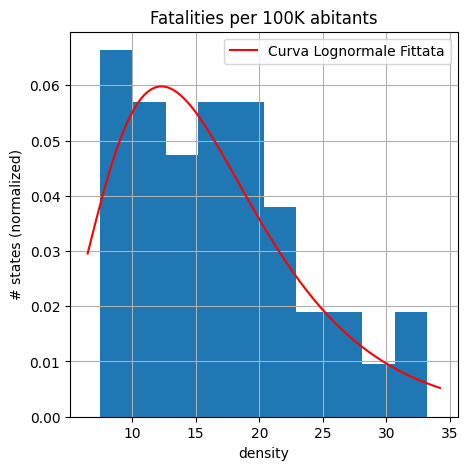

In [75]:
density = density_int[0]

frequencies, bin_edges = np.histogram(density, bins=10)  # Modifica il numero di bin se necessario

bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])  # punti medi dei bin

# Definisci la funzione lognormale da fittare ai dati
def lognorm_func(x, sigma, loc, scale):
  return frequencies.sum() * np.diff(bin_edges)[0] * lognorm.pdf(x, sigma, loc=loc, scale=scale)  # Il termine seguente "frequencies.sum() * np.diff(bin_edges)[0]" corrisponde all'area dell'istogramma, serve per riscalare la pdf in modo da fittarla con i nostri dati

# Fittare la curva ai dati
popt, pcov = curve_fit(lognorm_func, bin_centers, frequencies)

# Parametri ottimizzati
sigma_fit, loc_fit, scale_fit = popt

# Crea una distribuzione lognormale con i parametri fittati
x = np.linspace(min(density)-1, max(density)+1, 100)
pdf_fit = lognorm.pdf(x, sigma_fit, loc=loc_fit, scale=scale_fit)

# Plot dei dati e della curva fittata
plt.figure(figsize=(5, 5))

plt.subplot()

plt.hist(density, density=True)
plt.plot(x, pdf_fit, 'r-', label='Curva Lognormale Fittata')
plt.legend()
plt.grid()
plt.xlabel('density')
plt.ylabel('# states (normalized)')
plt.title('Fatalities per 100K abitants')
plt.show()

In [76]:
# Calcolo della seconda derivata
def second_derivative(func, x):
    h = 0.0001
    return (func(x - 2*h) - 2 * func(x - h) + func(x)) / (h ** 2)

# Calcolo dei punti in cui la concavità cambia
x_values = np.linspace(int(min(density_int[0])), int(max(density_int[0])),)  # range di valori di x da esaminare
second_derivatives = second_derivative(lambda x: lognorm_func(x, sigma_fit, loc_fit, scale_fit), x_values)
sign_changes = np.where(np.diff(np.sign(second_derivatives)))

# Stampa dei punti in cui la concavità cambia
print("Punti in cui la concavità cambia:")
for index in sign_changes:
    print("x =", x_values[index])

Punti in cui la concavità cambia:
x = [18.14285714]


## Creazione label e rimozione delle feature usate per determinare il cutoff

In [42]:
# Soglia densità per 100k abitanti (a sentimento(cambio segno derivata seconda))
cutoff = x_values[sign_changes[0][-1]]

labels_int = np.zeros(len(density_int[0]))
labels_int[density_int[0] > cutoff] = 1

labels_ext = np.zeros(len(density_ext[0]))
labels_ext[density_ext[0] > cutoff] = 1

# data_int = np.delete(data_int, features.index('Fatalities per 100K registered vehicles'), axis=1) # Elimina i dati degli incidenti perchè usati per la label
# data_ext = np.delete(data_ext, features.index('Fatalities per 100K registered vehicles'), axis=1) #
# del features[features.index('Fatalities per 100K registered vehicles')]                           #

data_int = np.delete(data_int, features.index('Traffic fatalities'), axis=1) # Elimina i dati degli incidenti perchè usati per la label
data_ext = np.delete(data_ext, features.index('Traffic fatalities'), axis=1) #
del features[features.index('Traffic fatalities')]                           #

data_int = np.delete(data_int, features.index('Total Population'), axis=1) # Elimina i dati della popolazione totale perchè usati per la label
data_ext = np.delete(data_ext, features.index('Total Population'), axis=1) #
del features[features.index('Total Population')]                           #


scaler = StandardScaler()
data = scaler.fit_transform(data_non_scaled)


## Matrice dei coefficienti di correlazione dei dati con calcolo degli autovalori e autovettori

In [43]:
# scaler = StandardScaler()
# scaled_data_int = scaler.fit_transform(data_int)

cov_mat = np.corrcoef(data_int, rowvar=False)        # Calcola matrice correlazione di Pearson tra le features  (check rowvar)
eig_val, eig_vec = np.linalg.eig(cov_mat)            # Calcola autovettori e autovalori matrice covarianza
sorted_idcs = np.argsort(eig_val)[::-1]

eig_val = eig_val[sorted_idcs]
eig_vec = eig_vec[:,sorted_idcs]
sorted_features = list(np.array(features)[sorted_idcs])
sorted_data_int = data_int[:,sorted_idcs]           # Dataset ordinato in ordine decrescente rispetto agli autovalori
sorted_data_ext = data_ext[:,sorted_idcs]
pd.options.display.float_format = '{:,.3e}'.format
jp('## Correlation Matrix:')
jp(pd.DataFrame(cov_mat))
jp('## Eigenvectors:')
jp(pd.DataFrame(eig_vec, columns = ['v'+str(i) for i in range(len(eig_vec))]))
jp('## Eigenvalues:')
jp(pd.DataFrame(eig_val.reshape(1, -1), index = ['λ'], columns = ['λ'+str(i) for i in range(len(eig_val))]))

## Correlation Matrix:

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000e+00,-1.109e-01,7.191e-02,2.678e-02,6.870e-02,2.809e-01,-1.371e-01,-5.110e-02,-3.089e-01,5.299e-02,2.643e-02,3.560e-02,2.911e-01,-8.543e-02
1,-1.109e-01,1.000e+00,-1.833e-01,-1.695e-01,-2.274e-01,-4.844e-01,-3.105e-01,-4.209e-01,-2.470e-01,-3.426e-01,2.951e-03,-1.439e-01,-1.881e-01,-1.698e-01
2,7.191e-02,-1.833e-01,1.000e+00,9.901e-01,9.898e-01,-1.341e-01,-2.225e-01,-2.088e-01,-2.362e-01,9.389e-01,-2.106e-02,9.867e-01,6.061e-01,3.688e-01
3,2.678e-02,-1.695e-01,9.901e-01,1.000e+00,9.896e-01,-1.542e-01,-2.042e-01,-2.156e-01,-2.309e-01,9.347e-01,-2.783e-02,9.793e-01,5.747e-01,3.434e-01
4,6.870e-02,-2.274e-01,9.898e-01,9.896e-01,1.000e+00,-6.589e-02,-1.425e-01,-1.438e-01,-1.831e-01,9.617e-01,-5.947e-02,9.654e-01,6.390e-01,3.152e-01
5,2.809e-01,-4.844e-01,-1.341e-01,-1.542e-01,-6.589e-02,1.000e+00,6.713e-01,8.295e-01,4.993e-01,5.304e-02,-2.281e-01,-1.681e-01,1.869e-01,-2.869e-01
6,-1.371e-01,-3.105e-01,-2.225e-01,-2.042e-01,-1.425e-01,6.713e-01,1.000e+00,9.061e-01,8.776e-01,3.500e-02,-1.036e-01,-2.627e-01,9.969e-02,-5.940e-01
7,-5.110e-02,-4.209e-01,-2.088e-01,-2.156e-01,-1.438e-01,8.295e-01,9.061e-01,1.000e+00,8.860e-01,4.874e-02,-1.165e-01,-2.476e-01,1.068e-01,-4.755e-01
8,-3.089e-01,-2.470e-01,-2.362e-01,-2.309e-01,-1.831e-01,4.993e-01,8.776e-01,8.860e-01,1.000e+00,2.228e-02,-7.785e-02,-2.717e-01,2.238e-02,-5.186e-01
9,5.299e-02,-3.426e-01,9.389e-01,9.347e-01,9.617e-01,5.304e-02,3.500e-02,4.874e-02,2.228e-02,1.000e+00,2.728e-03,8.913e-01,6.601e-01,2.247e-01


## Eigenvectors:

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13
0,4.671e-02,-1.900e-02,8.015e-01,-3.510e-02,-1.719e-01,2.524e-01,-3.294e-01,-3.768e-01,8.093e-02,-3.617e-02,4.434e-02,1.017e-02,8.855e-04,-1.182e-02
1,-6.248e-02,2.777e-01,-1.076e-01,6.157e-01,-1.523e-01,6.188e-01,3.149e-01,-9.717e-02,5.344e-02,1.004e-01,4.174e-03,-2.291e-02,-6.610e-03,-1.041e-02
2,4.108e-01,-9.082e-02,-5.368e-02,3.742e-02,-8.597e-03,1.016e-01,-5.590e-02,2.629e-03,-7.205e-02,-1.628e-01,-2.073e-01,-2.718e-01,1.717e-01,7.919e-01
3,4.071e-01,-8.871e-02,-9.198e-02,5.684e-02,-3.120e-03,9.900e-02,-1.356e-01,1.302e-01,1.408e-02,-7.441e-03,7.130e-01,2.545e-01,-4.281e-01,1.136e-01
4,4.035e-01,-1.313e-01,-4.733e-02,4.922e-02,1.007e-02,6.612e-02,-6.255e-02,7.855e-02,6.672e-02,1.669e-01,1.624e-01,1.877e-01,7.967e-01,-2.684e-01
5,-1.069e-01,-3.994e-01,3.003e-01,-2.053e-01,1.685e-01,3.536e-01,3.778e-01,4.347e-01,-1.658e-01,1.169e-01,-1.602e-01,3.575e-01,-4.714e-02,1.214e-01
6,-1.676e-01,-4.380e-01,-1.483e-01,5.097e-02,-9.391e-02,1.052e-01,-1.319e-01,8.791e-02,8.310e-01,-1.043e-01,-6.983e-02,-4.044e-02,-3.949e-02,3.072e-02
7,-1.623e-01,-4.594e-01,-5.820e-02,-9.637e-02,-1.553e-02,2.101e-01,1.192e-01,-8.873e-02,-2.842e-01,-1.063e-01,3.570e-01,-6.523e-01,7.587e-02,-1.809e-01
8,-1.739e-01,-3.974e-01,-3.260e-01,5.274e-02,-9.157e-02,3.469e-02,-9.444e-02,-6.036e-01,-2.651e-01,-5.611e-02,-7.743e-02,4.767e-01,2.551e-02,1.121e-01
9,3.699e-01,-2.199e-01,-8.194e-02,-6.385e-03,-7.824e-02,1.458e-02,-9.099e-02,-1.052e-01,-2.675e-02,7.085e-01,-3.320e-01,-1.985e-01,-3.156e-01,-1.745e-01


## Eigenvalues:

,λ0,λ1,λ2,λ3,λ4,λ5,λ6,λ7,λ8,λ9,λ10,λ11,λ12,λ13
λ,5.654e+00,3.788e+00,1.359e+00,1.201e+00,9.636e-01,4.232e-01,2.819e-01,1.756e-01,8.900e-02,4.432e-02,8.643e-03,6.769e-03,2.715e-03,1.370e-03


## PCA (Analisi delle componenti principali)

,Eigenvalue,Percentage,Cumulative
λ0,5.654e+00,40.389%,40.389%
λ1,3.788e+00,27.056%,67.445%
λ2,1.359e+00,9.708%,77.153%
λ3,1.201e+00,8.581%,85.735%
λ4,9.636e-01,6.883%,92.618%
λ5,4.232e-01,3.023%,95.64%
λ6,2.819e-01,2.014%,97.654%
λ7,1.756e-01,1.254%,98.908%
λ8,8.900e-02,0.636%,99.544%
λ9,4.432e-02,0.317%,99.861%


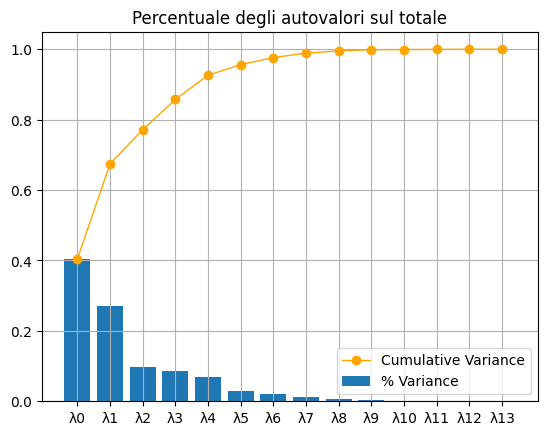

In [44]:
# Analisi autovalori

sum_ev = np.round(np.sum(eig_val), 1)

percentage_ev = np.abs(eig_val/sum_ev)
cumulative = np.cumsum(percentage_ev)
Tab = np.column_stack((['{:0.3e}'.format(num) for num in eig_val], ['{}%'.format(np.round(num*100,3)) for num in percentage_ev], ['{}%'.format(np.round(num*100,3)) for num in cumulative]))
end_line = np.vstack([['-','-','-'], [sum_ev, '{}%'.format(np.sum(percentage_ev)*100 // 1), '-']])
df = pd.DataFrame(np.vstack([Tab, end_line]), index = [f'λ{str(i)}' for i in range(len(eig_val))]+['-','TOT'], columns = ['Eigenvalue', 'Percentage', 'Cumulative'])

jupyprint(df)

plt.figure()
plt.title('Percentuale degli autovalori sul totale') # Più che la varianza non sto plottando la percentuale sul totale?
plt.xticks(range(1,len(eig_val)+1), ['λ'+str(i) for i in range(len(eig_val))])
plt.bar(range(1,len(eig_val)+1),percentage_ev, label = '% Variance')
plt.plot(range(1,len(eig_val)+1),cumulative, linewidth=1, marker='o', color = 'orange', label = 'Cumulative Variance')
plt.legend()
plt.grid()
plt.show()

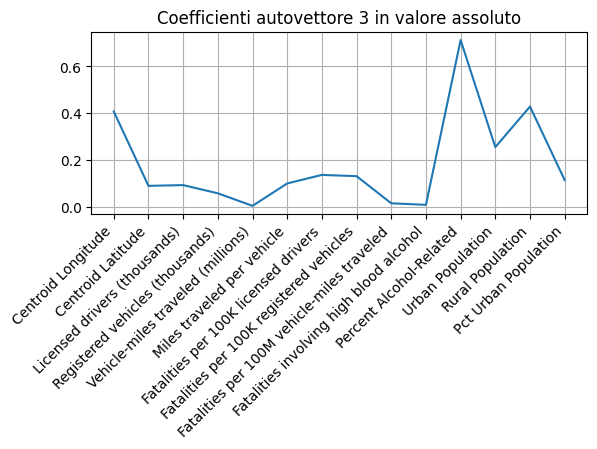

In [45]:
# Visualizza autovettore
vec_index = 3

plt.figure()
plt.subplots_adjust(bottom=0.5)
plt.title(f'Coefficienti autovettore {vec_index} in valore assoluto')
plt.xticks(range(0,len(eig_vec)), features, rotation=45, ha='right')
plt.plot(np.abs(eig_vec[vec_index]))
plt.grid()
plt.show()

### Scelta delle componenti principali

In [46]:
# Percentuale di varianza spiegata
t = 0.96

pc_eval = eig_val[cumulative < t] # prendo gli autovalori che spieghino un tot percentuale (t) della varianza
pc_evec = eig_vec[:,cumulative < t] # prendo i corrispettivi autovettori

pc_data_int = sorted_data_int @ pc_evec # Prodotto scalare tra matrice di dati (righe features, colonne stati) e matrice di autovettori principali disposti in colonna
pc_data_ext = sorted_data_ext @ pc_evec

jupyprint(pd.DataFrame(pc_eval.reshape(1,-1), index = ['pc λ'], columns = ['λ'+str(i) for i in range(len(pc_eval))]))
jupyprint(pd.DataFrame(pc_data_int, index = state_names_int, columns = ['Y'+str(i) for i in range(len(pc_eval))]))

,λ0,λ1,λ2,λ3,λ4,λ5
pc λ,5.654e+00,3.788e+00,1.359e+00,1.201e+00,9.636e-01,4.232e-01


,Y0,Y1,Y2,Y3,Y4,Y5
New Jersey,3.354e+06,-3.679e+05,-7.699e+05,-1.762e+05,2.778e+05,1.787e+06
Maryland,2.024e+06,-1.103e+05,-4.910e+05,-3.648e+05,2.818e+05,1.130e+06
Arkansas,8.374e+05,1.961e+05,-2.610e+05,-7.048e+05,3.606e+05,5.797e+05
Massachusetts,2.493e+06,-2.249e+05,-5.840e+05,-2.410e+05,2.549e+05,1.350e+06
Indiana,2.137e+06,1.379e+05,-5.813e+05,-9.546e+05,5.474e+05,1.303e+06
Alaska,2.122e+05,2.117e+04,-5.870e+04,-1.180e+05,6.506e+04,1.365e+05
Rhode Island,4.094e+05,-3.907e+04,-9.395e+04,-4.439e+04,4.466e+04,2.259e+05
Idaho,4.421e+05,4.242e+04,-1.224e+05,-2.374e+05,1.314e+05,2.804e+05
Missouri,1.951e+06,1.481e+05,-5.357e+05,-9.242e+05,5.231e+05,1.201e+06
Montana,2.854e+05,5.991e+04,-8.642e+04,-2.305e+05,1.191e+05,1.974e+05


## Folding

In [47]:
K = 3
n_est = 5
ML = ABC123(data_int, labels_int)
pc_ML = ABC123(pc_data_int, labels_int)

fd = ML.data_folding(K, show_kfold = True)

### Indici delle fold associate a ciascun campione:

$\begin{bmatrix}{} 1 & 0 & 2 & 1 & 1 & 0 & 2 & 0 & 1 & 0 & 2 & 0 & 0 & 2 & 2 & 2 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 2 & 2 & 2 & 0 & 2 & 2 & 2 & 0 & 2 & 0 & 1 & 0 & 0 & 1 & 0 & 1 & 1 & 0 \end{bmatrix}$

## Modello singolo

In [48]:
# initial parameters

if flag_my_init_pars:
    weights          = 2 * np.random.rand(len(data_int[0])) - 1                # crea una matrice 1x3 con numeri casuali tra -1 e 1
    correct_outputs  = labels_int               
    epoch            = 1000
    f_inputs         = data_int

In [52]:
# Allena il modello in base all'epoca scelta 
if flag_training:
    container_w = np.array([weights])
    for e in range(epoch):
        weights = SGD_method(weights, f_inputs, correct_outputs)
        container_w = np.vstack((container_w, weights))
    # Salva modello
    Trained_Network = {
        "Weight"         : weights,
        "correct_Output" : correct_outputs.T,
        "epoch"          : [[epoch]],
        "input"          : f_inputs
    }

C:\Users\fsfinardi\AppData\Local\Temp\ipykernel_19384\510413344.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


1001
[0. 0. 0. ... 0. 0. 0.]


C:\Users\fsfinardi\AppData\Local\Temp\ipykernel_19384\510413344.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


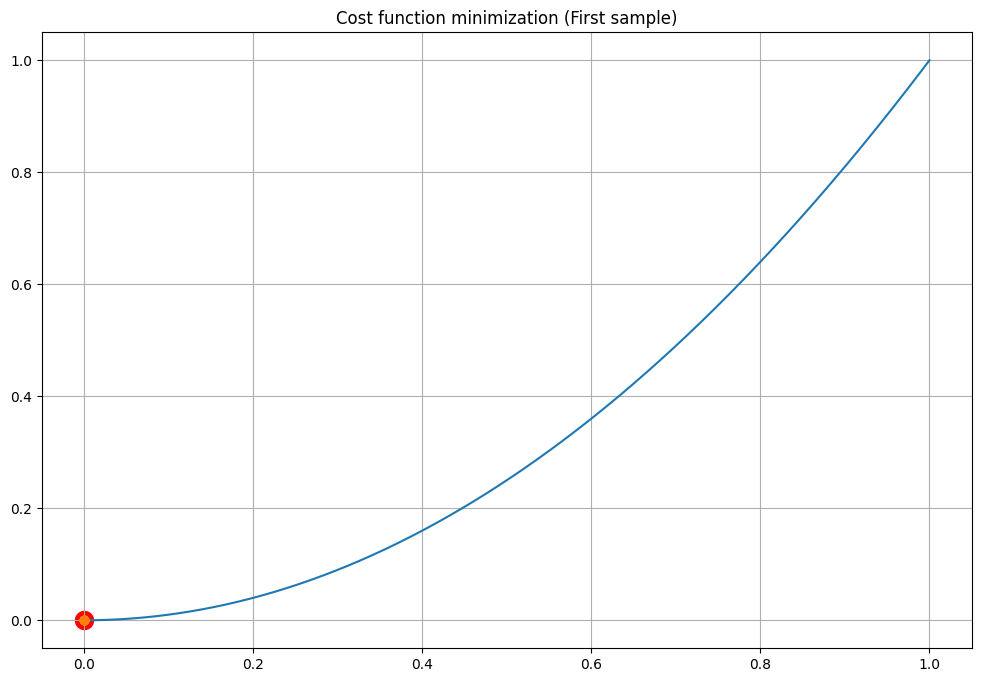

In [70]:
if flag_training:
    def cost_func(x, x0):
        return (x - x0)**2

    x = np.linspace(0, 1, 1000)  
    x0 = 0

    plt.figure(figsize=(12,8))

    plt.grid()
    plt.plot(x, cost_func(x, x0))
    #print(len(f_inputs[0]))
    print(len(container_w @ f_inputs[0]))
    P = Sigmoid(container_w @ f_inputs[0])
    print(P)
    #P = np.tanh(container_w @ f_inputs[0])
    E = np.ones(len(P)) * correct_outputs[0]
    plt.scatter(E[0],0, color='red', linewidth=8)
    plt.plot(P, cost_func(P, E), marker = 'o')
    plt.title('Cost function minimization (First sample)')
    plt.show()